In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
source = 'C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset'
sourceAcnes = os.path.join(source, 'acnes')
sourceBlackheads = os.path.join(source, 'blackheads')
sourceDarkSpots = os.path.join(source, 'darkspots')
sourceWrinkles = os.path.join(source, 'wrinkles')

print(f"There are {len(os.listdir(sourceAcnes))} images of acnes.")
print(f"There are {len(os.listdir(sourceBlackheads))} images of blackheads.")
print(f"There are {len(os.listdir(sourceDarkSpots))} images of darkspots.")
print(f"There are {len(os.listdir(sourceWrinkles))} images of wrinkles.")

There are 250 images of acnes.
There are 250 images of blackheads.
There are 250 images of darkspots.
There are 246 images of wrinkles.


In [3]:
import os
import shutil

# Define root directory
root_dir = 'C:/Users/Kholoud/Desktop/jupyter notebook/SkinMatee'

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# Create train and validation directories
def create_train_val_dirs(root_path):
    # train and validation directories for skin-case
    train_dir = os.path.join(root_dir, 'training')
    os.makedirs(train_dir, exist_ok=True)
    val_dir = os.path.join(root_dir, 'validation')
    os.makedirs(val_dir, exist_ok=True)

    # train directories for acnes
    train_acnes_dir = os.path.join(train_dir, 'acnes')
    os.makedirs(train_acnes_dir, exist_ok=True)
    # train directories for blackheads
    train_blackheads_dir = os.path.join(train_dir, 'blackheads')
    os.makedirs(train_blackheads_dir, exist_ok=True)
    # train directories for darkspots
    train_darkspots_dir = os.path.join(train_dir, 'darkspots')
    os.makedirs(train_darkspots_dir, exist_ok=True)
    # train directories for wrinkles
    train_wrinkles_dir = os.path.join(train_dir, 'wrinkles')
    os.makedirs(train_wrinkles_dir, exist_ok=True)

    # validation directories for acnes
    val_acnes_dir = os.path.join(val_dir, 'acnes')
    os.makedirs(val_acnes_dir, exist_ok=True)
    # validation directories for blackheads
    val_blackheads_dir = os.path.join(val_dir, 'blackheads')
    os.makedirs(val_blackheads_dir, exist_ok=True)
    # validation directories for darkspots
    val_darkspots_dir = os.path.join(val_dir, 'darkspots')
    os.makedirs(val_darkspots_dir, exist_ok=True)
    # validation directories for wrinkles
    val_wrinkles_dir = os.path.join(val_dir, 'wrinkles')
    os.makedirs(val_wrinkles_dir, exist_ok=True)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

# Print all directories
#for rootdir, dirs, files in os.walk(root_dir):
#    for subdir in dirs:
#        print(os.path.join(rootdir, subdir))

In [4]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    all_files = len(files)
    train_length = int(all_files * SPLIT_SIZE)
    test_length = int(all_files - train_length)
    shuffled = random.sample(files, all_files)
    train_set = shuffled[0:train_length]
    test_set = shuffled[train_length:]

  for filename in train_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)

  for filename in test_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)

  pass

In [5]:
# Test your split_data function

# Define paths
ACNES_SOURCE_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset/acnes/"
BLACKHEADS_SOURCE_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset/blackheads/"
DARKSPOTS_SOURCE_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset/darkspots/"
WRINKLES_SOURCE_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset/wrinkles/"

TRAINING_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMatee/training"
VALIDATION_DIR = "C:/Users/Kholoud/Desktop/jupyter notebook/SkinMatee/validation"

TRAINING_ACNES_DIR = os.path.join(TRAINING_DIR, "acnes/")
VALIDATION_ACNES_DIR = os.path.join(VALIDATION_DIR, "acnes/")

TRAINING_BLACKHEADS_DIR = os.path.join(TRAINING_DIR, "blackheads/")
VALIDATION_BLACKHEADS_DIR = os.path.join(VALIDATION_DIR, "blackheads/")

TRAINING_DARKSPOTS_DIR = os.path.join(TRAINING_DIR, "darkspots/")
VALIDATION_DARKSPOTS_DIR = os.path.join(VALIDATION_DIR, "darkspots/")

TRAINING_WRINKLES_DIR = os.path.join(TRAINING_DIR, "wrinkles/")
VALIDATION_WRINKLES_DIR = os.path.join(VALIDATION_DIR, "wrinkles/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TRAINING_WRINKLES_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_WRINKLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_WRINKLES_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8


In [6]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ACNES_SOURCE_DIR, TRAINING_ACNES_DIR, VALIDATION_ACNES_DIR, split_size)
split_data(BLACKHEADS_SOURCE_DIR, TRAINING_BLACKHEADS_DIR, VALIDATION_BLACKHEADS_DIR, split_size)
split_data(DARKSPOTS_SOURCE_DIR, TRAINING_DARKSPOTS_DIR, VALIDATION_DARKSPOTS_DIR, split_size)
split_data(WRINKLES_SOURCE_DIR, TRAINING_WRINKLES_DIR, VALIDATION_WRINKLES_DIR, split_size)

print(f"\n\nOriginal acne's directory has {len(os.listdir(ACNES_SOURCE_DIR))} images")
print(f"\n\nOriginal blackhead's directory has {len(os.listdir(BLACKHEADS_SOURCE_DIR))} images")
print(f"\n\nOriginal darkspot's directory has {len(os.listdir(DARKSPOTS_SOURCE_DIR))} images")
print(f"\n\nOriginal winkle's directory has {len(os.listdir(WRINKLES_SOURCE_DIR))} images")
print(f"\n\nThere are {len(os.listdir(TRAINING_ACNES_DIR))} images of acnes for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_ACNES_DIR))} images of acnes for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_BLACKHEADS_DIR))} images of blackheads for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_BLACKHEADS_DIR))} images of blackheads for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_DARKSPOTS_DIR))} images of darkspots for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_DARKSPOTS_DIR))} images of darkspots for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of wrinkles for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_WRINKLES_DIR))} images of wrinkles for validation")



Original acne's directory has 250 images


Original blackhead's directory has 250 images


Original darkspot's directory has 250 images


Original winkle's directory has 246 images


There are 200 images of acnes for training


There are 50 images of acnes for validation


There are 200 images of blackheads for training


There are 50 images of blackheads for validation


There are 200 images of darkspots for training


There are 50 images of darkspots for validation


There are 196 images of wrinkles for training


There are 50 images of wrinkles for validation


In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [8]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 796 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [9]:
# Define a Callback class that stops training once accuracy reaches 90.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.85):
      print("\nReached 91.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:

def create_model():

  model = tf.keras.models.Sequential([
      # Conv2D and MaxPooling2D layers
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(4, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

In [11]:
# Get the untrained model
model = create_model()

model.summary()

C:\Users\Kholoud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 148, 148, 16)          │         448 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 74, 74, 16)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 72, 72, 32)            │       4,640 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 36, 36, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 34, 34, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 17, 17, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 18496)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 512)                   │   9,470,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 64)                    │      32,832 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 4)                     │         260 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 9,527,140 (36.34 MB)

 Trainable params: 9,527,140 (36.34 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

# Train the model
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=100,
                    verbose=2,
                    validation_data=validation_generator,
                    callbacks=callbacks
                   )

Epoch 1/100


C:\Users\Kholoud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 24s - 942ms/step - acc: 0.5000 - loss: 0.4546 - val_acc: 0.5650 - val_loss: 0.3777
Epoch 2/100
25/25 - 12s - 498ms/step - acc: 0.6143 - loss: 0.3463 - val_acc: 0.6750 - val_loss: 0.3158
Epoch 3/100
25/25 - 13s - 501ms/step - acc: 0.6847 - loss: 0.3070 - val_acc: 0.6650 - val_loss: 0.3449
Epoch 4/100
25/25 - 12s - 498ms/step - acc: 0.6997 - loss: 0.2956 - val_acc: 0.7600 - val_loss: 0.2686
Epoch 5/100
25/25 - 13s - 507ms/step - acc: 0.7060 - loss: 0.2911 - val_acc: 0.7450 - val_loss: 0.2682
Epoch 6/100
25/25 - 12s - 497ms/step - acc: 0.7211 - loss: 0.2875 - val_acc: 0.6850 - val_loss: 0.3049
Epoch 7/100
25/25 - 13s - 505ms/step - acc: 0.7475 - loss: 0.2777 - val_acc: 0.7300 - val_loss: 0.2876
Epoch 8/100
25/25 - 13s - 511ms/step - acc: 0.7399 - loss: 0.2685 - val_acc: 0.7450 - val_loss: 0.2589
Epoch 9/100
25/25 - 12s - 496ms/step - acc: 0.7500 - loss: 0.2622 - val_acc: 0.7300 - val_loss: 0.2620
Epoch 10/100
25/25 - 12s - 487ms/step - acc: 0.7211 - loss: 0.2796 - val_acc: 0.7350 

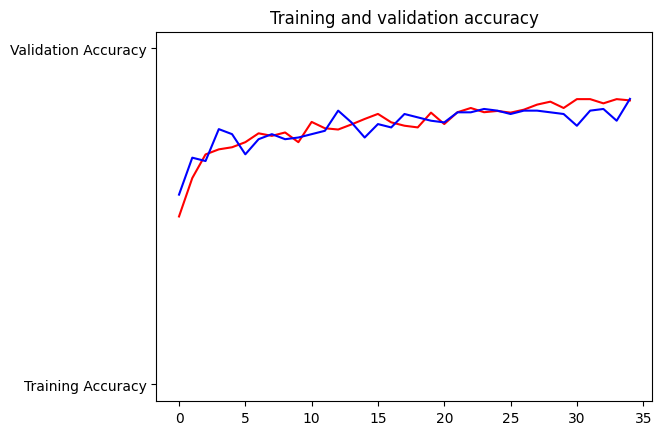

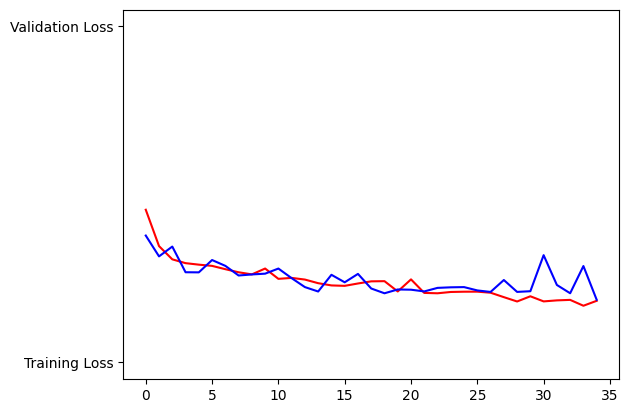

[0.5649999976158142, 0.675000011920929, 0.6650000214576721, 0.7599999904632568, 0.7450000047683716, 0.6850000023841858, 0.7300000190734863, 0.7450000047683716, 0.7300000190734863, 0.7350000143051147, 0.7450000047683716, 0.7549999952316284, 0.8149999976158142, 0.7799999713897705, 0.7350000143051147, 0.7749999761581421, 0.7649999856948853, 0.8050000071525574, 0.7950000166893005, 0.7850000262260437, 0.7799999713897705, 0.8100000023841858, 0.8100000023841858, 0.8199999928474426, 0.8149999976158142, 0.8050000071525574, 0.8149999976158142, 0.8149999976158142, 0.8100000023841858, 0.8050000071525574, 0.7699999809265137, 0.8149999976158142, 0.8199999928474426, 0.7850000262260437, 0.8500000238418579]


In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
print(val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


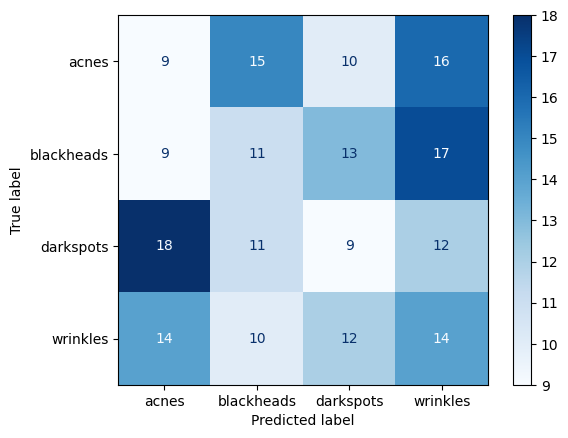

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
# Get the true labels and predictions for the validation data
validation_generator.reset()
predictions = model.predict(validation_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
import ipywidgets as widgets
from IPython.display import display

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept image files
    multiple=True  # Accept multiple files
)
display(upload_button)
print("Upload button created")

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Upload button created


In [73]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from io import BytesIO
from PIL import Image

# Assuming 'model' is already defined and loaded

# Process uploaded files
for uploaded_file in upload_button.value:
    try:
        print(f"Processing file: {uploaded_file['name']}")
        # predicting images
        file_content = uploaded_file['content']
        img = Image.open(BytesIO(file_content)).resize((150, 150))
        img = img.convert('RGB')  # Ensure image is in RGB mode
        x = img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        print(f"Image shape after processing: {x.shape}")

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        print(f"Predicted classes: {classes}")

        classes_normalized = classes * 1000
        classes_rounded = np.round(classes_normalized)
        classes_in_level = classes_rounded / 100
        classes_in_level_rounded = np.ceil(classes_in_level)
        classes_in_level_rounded_1d = classes_in_level_rounded.flatten()

        acnes_level = int(classes_in_level_rounded_1d[0])
        blackheads_level = int(classes_in_level_rounded_1d[1])
        darkspots_level = int(classes_in_level_rounded_1d[2])
        wrinkles_level = int(classes_in_level_rounded_1d[3])

        print('Acnes level      : ' + str(acnes_level))
        print('Blackheads level : ' + str(blackheads_level))
        print('Darkspots level  : ' + str(darkspots_level))
        print('Wrinkles level   : ' + str(wrinkles_level))

        categories = np.array(['acnes', 'blackheads', 'darkspots', 'wrinkles'])
        max_index = np.argmax(classes_in_level_rounded)
        max_category = categories[max_index]
        print(f"\nMost significant skin problem: " + str(max_category))
    except Exception as e:
        print(f"Error processing file {uploaded_file['name']}: {str(e)}")


Processing file: WhatsApp Image 2024-07-08 at 3.00.23 PM.jpeg
Image shape after processing: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted classes: [[3.3751188e-05 2.5457064e-02 2.4354886e-01 7.5186229e-01]]
Acnes level      : 0
Blackheads level : 1
Darkspots level  : 3
Wrinkles level   : 8

Most significant skin problem: wrinkles


In [76]:

# Save the model architecture in JSON format
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights in H5 format
model.save("skinmate-model-4.h5")
model.save('my_model.keras')

In [77]:
model.save('my_model_prediction---.keras')

In [23]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from shutil import copyfile
from tensorflow.keras.utils import load_img, img_to_array
from io import BytesIO
from PIL import Image

# Define directories
source = 'C:/Users/Kholoud/Desktop/jupyter notebook/SkinMate-Dataset-20240630T095515Z-001/SkinMate-Dataset'
sourceAcnes = os.path.join(source, 'acnes')
sourceBlackheads = os.path.join(source, 'blackheads')
sourceDarkSpots = os.path.join(source, 'darkspots')
sourceWrinkles = os.path.join(source, 'wrinkles')

root_dir = 'C:/Users/Kholoud/Desktop/jupyter notebook/SkinMatee'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# Create train and validation directories
def create_train_val_dirs(root_path):
    train_dir = os.path.join(root_dir, 'training')
    os.makedirs(train_dir, exist_ok=True)
    val_dir = os.path.join(root_dir, 'validation')
    os.makedirs(val_dir, exist_ok=True)

    for category in ['acnes', 'blackheads', 'darkspots', 'wrinkles']:
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)

create_train_val_dirs(root_path=root_dir)

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    files = [f for f in os.listdir(SOURCE_DIR) if os.path.getsize(os.path.join(SOURCE_DIR, f)) > 0]
    random.shuffle(files)
    train_size = int(len(files) * SPLIT_SIZE)
    train_set = files[:train_size]
    val_set = files[train_size:]

    for filename in train_set:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(TRAINING_DIR, filename))
    for filename in val_set:
        copyfile(os.path.join(SOURCE_DIR, filename), os.path.join(VALIDATION_DIR, filename))

split_size = 0.8
split_data(sourceAcnes, os.path.join(root_dir, 'training/acnes'), os.path.join(root_dir, 'validation/acnes'), split_size)
split_data(sourceBlackheads, os.path.join(root_dir, 'training/blackheads'), os.path.join(root_dir, 'validation/blackheads'), split_size)
split_data(sourceDarkSpots, os.path.join(root_dir, 'training/darkspots'), os.path.join(root_dir, 'validation/darkspots'), split_size)
split_data(sourceWrinkles, os.path.join(root_dir, 'training/wrinkles'), os.path.join(root_dir, 'validation/wrinkles'), split_size)

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       rotation_range=20,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.1,
                                       zoom_range=0.1,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))
    return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(os.path.join(root_dir, 'training'),
                                                             os.path.join(root_dir, 'validation'))

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_acc') >= 0.91:
            print("\nReached 91.0% accuracy so cancelling training!")
            self.model.stop_training = True

def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(4, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    return model

model = create_resnet_model()

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_generator.classes),
                                     y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=100,
                    verbose=2,
                    validation_data=validation_generator,
                    callbacks=[callbacks],
                    class_weight=class_weights)

# Evaluate the model
validation_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(validation_labels, predicted_classes, target_names=train_generator.class_indices.keys()))
print(confusion_matrix(validation_labels, predicted_classes))

# Image prediction
def predict_image(model, img_path):
    img = load_img(img_path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255.0
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    return predictions

# Upload and predict
uploaded_files = upload_button.value

for uploaded_file in uploaded_files:
    try:
        file_content = uploaded_file['content']
        img = Image.open(BytesIO(file_content)).resize((150, 150))
        img = img.convert('RGB')
        x = img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)
        predictions = model.predict(x)

        classes_normalized = predictions * 1000
        classes_rounded = np.round(classes_normalized)
        classes_in_level = classes_rounded / 100
        classes_in_level_rounded = np.ceil(classes_in_level)
        classes_in_level_rounded_1d = classes_in_level_rounded.flatten()

        acnes_level = int(classes_in_level_rounded_1d[0])
        blackheads_level = int(classes_in_level_rounded_1d[1])
        darkspots_level = int(classes_in_level_rounded_1d[2])
        wrinkles_level = int(classes_in_level_rounded_1d[3])

        print(f'Acnes level      : {acnes_level}')
        print(f'Blackheads level : {blackheads_level}')
        print(f'Darkspots level  : {darkspots_level}')
        print(f'Wrinkles level   : {wrinkles_level}')

        categories = np.array(['acnes', 'blackheads', 'darkspots', 'wrinkles'])
        max_index = np.argmax(classes_in_level_rounded)
        max_category = categories[max_index]
        print(f"\nMost significant skin problem: {max_category}")
    except Exception as e:
        print(f"Error processing file {uploaded_file['name']}: {str(e)}")


Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/100


C:\Users\Kholoud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 28s - 1s/step - acc: 0.2925 - loss: 0.5767 - val_acc: 0.5200 - val_loss: 0.5554
Epoch 2/100
25/25 - 18s - 712ms/step - acc: 0.3388 - loss: 0.5539 - val_acc: 0.4000 - val_loss: 0.5513
Epoch 3/100
25/25 - 17s - 700ms/step - acc: 0.3638 - loss: 0.5418 - val_acc: 0.2500 - val_loss: 0.5442
Epoch 4/100
25/25 - 17s - 699ms/step - acc: 0.4187 - loss: 0.5251 - val_acc: 0.4400 - val_loss: 0.5025
Epoch 5/100
25/25 - 18s - 711ms/step - acc: 0.4812 - loss: 0.5050 - val_acc: 0.4400 - val_loss: 0.4983
Epoch 6/100
25/25 - 18s - 707ms/step - acc: 0.4550 - loss: 0.4990 - val_acc: 0.3750 - val_loss: 0.5022
Epoch 7/100
25/25 - 18s - 710ms/step - acc: 0.4800 - loss: 0.4869 - val_acc: 0.4850 - val_loss: 0.4740
Epoch 8/100
25/25 - 18s - 709ms/step - acc: 0.4950 - loss: 0.4763 - val_acc: 0.5400 - val_loss: 0.4550
Epoch 9/100
25/25 - 18s - 706ms/step - acc: 0.5525 - loss: 0.4613 - val_acc: 0.4800 - val_loss: 0.4609
Epoch 10/100
25/25 - 18s - 707ms/step - acc: 0.5500 - loss: 0.4646 - val_acc: 0.6200 - v